In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [224]:
def U(q):
    return (q + 9) * (q + 2) * (q - 4) * (q - 8.5) + 1772.8877

def H(q, p, m=1.0):
    return U(q) + p**2 / 2 / m

<AxesSubplot:>

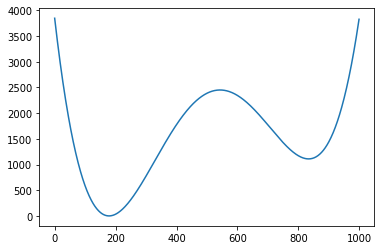

In [225]:
s = pd.Series(U(np.linspace(-10, 10, 1000)))
s.plot()

In [226]:
# H = U(q) + p^2/(2m)
# p' = dH/dq = dU(q)/dq = 0.5 * [8q^3 − 9q^2 − 342q + 2982]
# q = q + \eps * p' = q + \eps * [0.5 * [8p^3 − 9p^2 − 342p + 2982]]
# q' = dH/dp = p/m = p  where (m=1)
# p = p + \eps * q' = p - \eps*(q)

def leapfrog_update(q, p, eps=0.01):
    #print(q, p)
    p_half = p - eps/2 * (0.5 * (8 * q**3 - 9 * q**2 - 342 * q + 298))
    q_next = q + eps * p_half
    p_next = p_half - eps/2 * (0.5 * (8 * q_next**3 - 9 * q_next**2 - 342 * q_next + 298))
    return q_next, p_next

2000

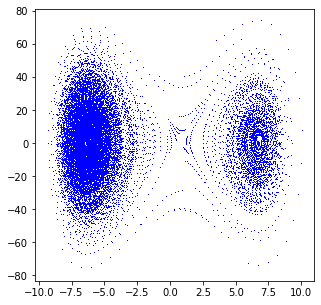

In [227]:
fig = plt.figure(figsize=(5, 5))

states = []
N = 2000
steps = 10
ps = np.random.normal(0, 20, N)

q, p = 0., 10.
for i in range(N):
    for j in range(steps):
        plt.plot(q, p, marker=',', color='blue')
        q, p = leapfrog_update(q, p)
    states.append(H(q, p))
    p = ps[i]

len(states)

<AxesSubplot:>

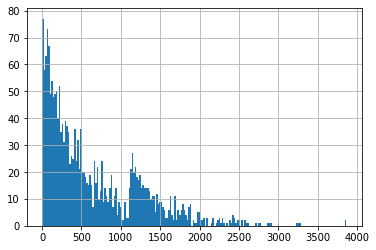

In [228]:
s = pd.Series(states)
s.hist(bins=200)